In [21]:
import networkx as nx
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from practice02_lsm import *
import pandas as pd

pio.templates.default = "plotly_white"


In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
monks = pd.read_csv("sampson_monks.txt", index_col=0)
monks = monks.reset_index(drop=True)
monks.values

array([[0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

In [26]:
mat = np.array(
  [
    [0, 1, 1, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
  ]
)
lsm = LSM()
sol = lsm.compute_lsm(X=mat)
# sol = lsm.compute_lsm(X=monks.values)

fig = go.Figure()
fig.add_trace(
  go.Scatter(y=lsm.track_negloklik, mode="lines", name="Negative log-likelihood")
)


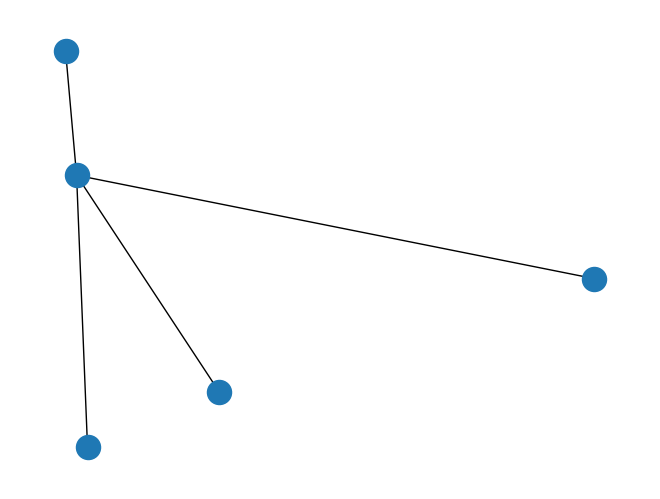

In [20]:
*latent_pos, alpha = sol.x
latent_pos = np.array(latent_pos).reshape(-1, 2)

# plot graph with nx from coordinates
G = nx.from_numpy_matrix(mat)
pos = {i: latent_pos[i] for i in range(len(latent_pos))}
nx.draw(G, pos=pos)

In [5]:
latent_pos

array([[-0.38323715, -0.30910965],
       [-0.38323728, -0.30910959],
       [-0.18761114, -1.06878471],
       [ 0.00484322,  0.18076071],
       [-0.88402537, -0.29732996]])